In [1]:
# This example is from
# https://github.com/Pyomo/pyomo/blob/master/examples/dae/Optimal_Control.py
#

$$
\begin{align}
\min \;\;&x_2(t_f) \\
\frac{dx_1}{dt} &= u \\
\frac{dx_2}{dt} &= x_1^2 + u^2 
\end{align} \\
x_1(0) = 1, x_2(0) = 0, t_f = 0
$$

In [2]:
import pyomo.environ as pyo
import pyomo.dae as pyde

In [3]:
m = pyo.ConcreteModel()

In [4]:
m.t = pyde.ContinuousSet(bounds = (0, 1))

In [5]:
m.x1 = pyo.Var(m.t, bounds = (0, 1))
m.x2 = pyo.Var(m.t, bounds = (0, 1))
m.u = pyo.Var(m.t, initialize = 0)

m.x1dot = pyde.DerivativeVar(m.x1, wrt = m.t)
m.x2dot = pyde.DerivativeVar(m.x2, wrt = m.t)

In [6]:
m.obj = pyo.Objective(expr = m.x2[1], sense = pyo.minimize)

In [7]:
def _x1dot(M, i):
    if i == 0:
        return pyo.Constraint.Skip
    else:
        expr = M.x1dot[i] == m.u[i]
    return expr
m.x1dot_cons = pyo.Constraint(m.t, rule = _x1dot)

In [8]:
def _x2dot(M, i):
    if i == 0:
        return pyo.Constraint.Skip
    else:
        expr = M.x2dot[i] == m.x1[i]**2 + m.u[i]**2
    return expr
m.x2dot_cons = pyo.Constraint(m.t, rule = _x2dot)

In [ ]:
#def _init(M):
#    yield M.x1[0] == 1
#    yield M.x2[0] == 0
#    yield pyo.ConstraintList.End
#m.init_conditions = pyo.ConstraintList(rule = _init)

In [9]:
m.init_x1 = pyo.Constraint(expr = m.x1[0] == 1)
m.init_x2 = pyo.Constraint(expr = m.x2[0] == 0)

In [10]:
m.pprint()

3 Var Declarations
    u : Size=2, Index=t
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :  None :     0 :  None : False : False :  Reals
          1 :  None :     0 :  None : False : False :  Reals
    x1 : Size=2, Index=t
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True :  Reals
          1 :     0 :  None :     1 : False :  True :  Reals
    x2 : Size=2, Index=t
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :  None :     1 : False :  True :  Reals
          1 :     0 :  None :     1 : False :  True :  Reals

1 Objective Declarations
    obj : Size=1, Index=None, Active=True
        Key  : Active : Sense    : Expression
        None :   True : minimize :      x2[1]

4 Constraint Declarations
    init_x1 : Size=1, Index=None, Active=True
        Key  : Lower : Body  : Upper : Active
        None :   1.0 : x1[0] :   1.0 :   True
    init_x2 : Size=1, Index=None,

In [11]:
# Discretize model using Orthogonal Collocation
discretizer = pyo.TransformationFactory('dae.collocation')
discretizer.apply_to(m,nfe=20,ncp=3,scheme='LAGRANGE-RADAU')
m.pprint()

5 Var Declarations
    u : Size=61, Index=t
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
               0 :  None :     0 :  None : False : False :  Reals
        0.007753 :  None :     0 :  None : False : False :  Reals
        0.032247 :  None :     0 :  None : False : False :  Reals
            0.05 :  None :     0 :  None : False : False :  Reals
        0.057753 :  None :     0 :  None : False : False :  Reals
        0.082247 :  None :     0 :  None : False : False :  Reals
             0.1 :  None :     0 :  None : False : False :  Reals
        0.107753 :  None :     0 :  None : False : False :  Reals
        0.132247 :  None :     0 :  None : False : False :  Reals
            0.15 :  None :     0 :  None : False : False :  Reals
        0.157753 :  None :     0 :  None : False : False :  Reals
        0.182247 :  None :     0 :  None : False : False :  Reals
             0.2 :  None :     0 :  None : False : False :  Reals
        0.207753 :  None :     0

In [12]:
discretizer.reduce_collocation_points(m,var=m.u,ncp=1,contset=m.t)
m.pprint()

1 Set Declarations
    u_interpolation_constraints_index : Dim=0, Dimen=1, Size=40, Domain=None, Ordered=False, Bounds=None
        [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40]

5 Var Declarations
    u : Size=61, Index=t
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
               0 :  None :     0 :  None : False : False :  Reals
        0.007753 :  None :     0 :  None : False : False :  Reals
        0.032247 :  None :     0 :  None : False : False :  Reals
            0.05 :  None :     0 :  None : False : False :  Reals
        0.057753 :  None :     0 :  None : False : False :  Reals
        0.082247 :  None :     0 :  None : False : False :  Reals
             0.1 :  None :     0 :  None : False : False :  Reals
        0.107753 :  None :     0 :  None : False : False :  Reals
        0.132247 :  None :     0 :  None : False : False :  Reals
           

In [13]:
solver=pyo.SolverFactory('ipopt')
results = solver.solve(m,tee=True)

Ipopt 3.12.12: 

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.12, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      982
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:      120

Total number of variables............................:      302
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      122
                     variables with only upper bounds:        0
Tot

In [14]:
x1 = []
x2 = []
u = []
t=[]

print(sorted(m.t))

for i in sorted(m.t):
    t.append(i)
    x1.append(pyo.value(m.x1[i]))
    x2.append(pyo.value(m.x2[i]))
    u.append(pyo.value(m.u[i]))

[0, 0.007753, 0.032247, 0.05, 0.057753, 0.082247, 0.1, 0.107753, 0.132247, 0.15, 0.157753, 0.182247, 0.2, 0.207753, 0.232247, 0.25, 0.257753, 0.282247, 0.3, 0.307753, 0.332247, 0.35, 0.357753, 0.382247, 0.4, 0.407753, 0.432247, 0.45, 0.457753, 0.482247, 0.5, 0.507753, 0.532247, 0.55, 0.557753, 0.582247, 0.6, 0.607753, 0.632247, 0.65, 0.657753, 0.682247, 0.7, 0.707753, 0.732247, 0.75, 0.757753, 0.782247, 0.8, 0.807753, 0.832247, 0.85, 0.857753, 0.882247, 0.9, 0.907753, 0.932247, 0.95, 0.957753, 0.982247, 1]


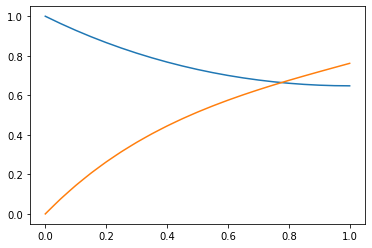

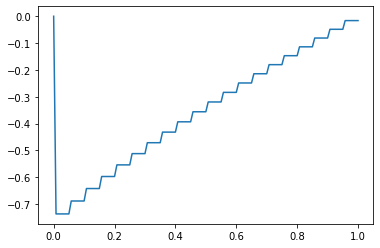

In [15]:
import matplotlib.pyplot as plt

plt.plot(t,x1)
plt.plot(t,x2)
plt.show()

plt.plot(t,u)
plt.show()